In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 
# prview fatality for driver catu ==1
# tryig to set the target variable as the fatal or non fatal accindents in France metropolitan area
#Step 2/ Pre-processing and feature engineering : Deadline Friday, 14th of July
#Following the observations made in the previous step, you will have to clean your dataset and perform the pre-processing steps.
#If necessary, you will have to transform and/or add features and enrich your dataset.
#The objective at the end of this step is to have a dataset ready to perform in-depth analysis and/or modeling using Randon Forest Classifier 

In [2]:
#new data cleaned file
df = pd.read_csv("./data/230921_basic_table_for_analysis_cleaned.csv", index_col=0, low_memory=False)

In [3]:
df_M = df[(df['metropolitan'] == 1)]
df_M['metropolitan'].describe()

count    2421738.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: metropolitan, dtype: float64

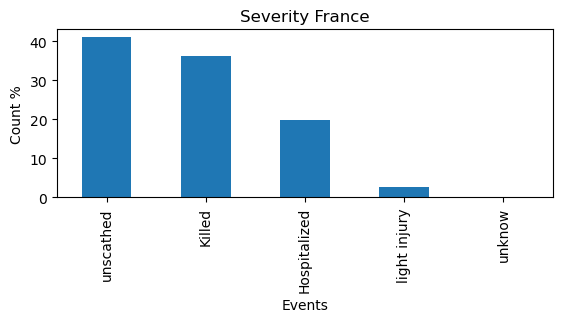

In [4]:
import matplotlib.pyplot as plt
event_counts = df_M['grav'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
labels = ['unscathed','Killed','Hospitalized','light injury','unknow']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity France')
# Display the plot
plt.show()

In [5]:
# Count the number of data points with the value -1 in the 'grav' variable
unknown_count = (df_M['grav'] == -1).sum()

# Print the count
print(f"Number of data points with the value -1 in the 'grav' variable: {unknown_count}")

Number of data points with the value -1 in the 'grav' variable: 54


In [6]:
#removing the values of unknow from the data
df_M = df_M[df_M['grav'] != -1]

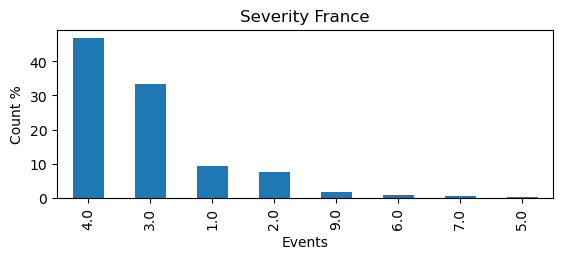

In [7]:
event_counts = df_M['catr'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
#labels = ['unscathed','Killed','Hospitalized','light injury']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)))
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity France')
# Display the plot
plt.show()

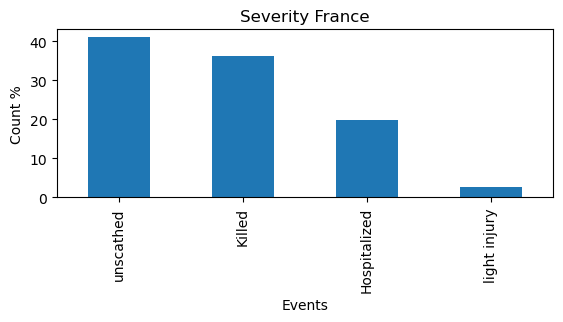

In [8]:
event_counts = df_M['grav'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
labels = ['unscathed','Killed','Hospitalized','light injury']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity France')
# Display the plot
plt.show()

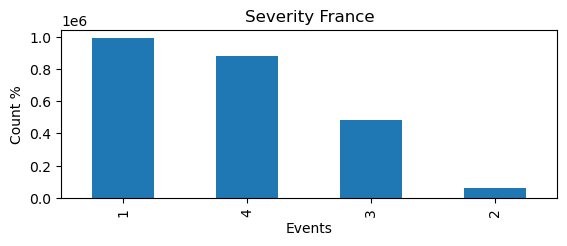

In [9]:
event_counts = df_M['grav'].value_counts()
#event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_counts.plot.bar()
#abels = ['unscathed','Killed','Hospitalized','light injury']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)))
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity France')
# Display the plot
plt.show()

In [10]:
import numpy as np
# create target variable
# create a new variable for the severity ['Grav'] of accidents ( Sereve, non-severe) as a possible target variable
#### zero = non severe and one equal to severe
df_M['Severe'] = np.where(df_M['grav'].isin([1, 2]), 0, 1)

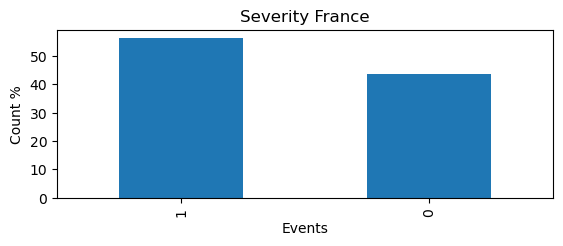

In [11]:
event_counts = df_M['Severe'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
#labels = ['unscathed','Killed','Hospitalized','light injury']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)))
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity France')
# Display the plot
plt.show()

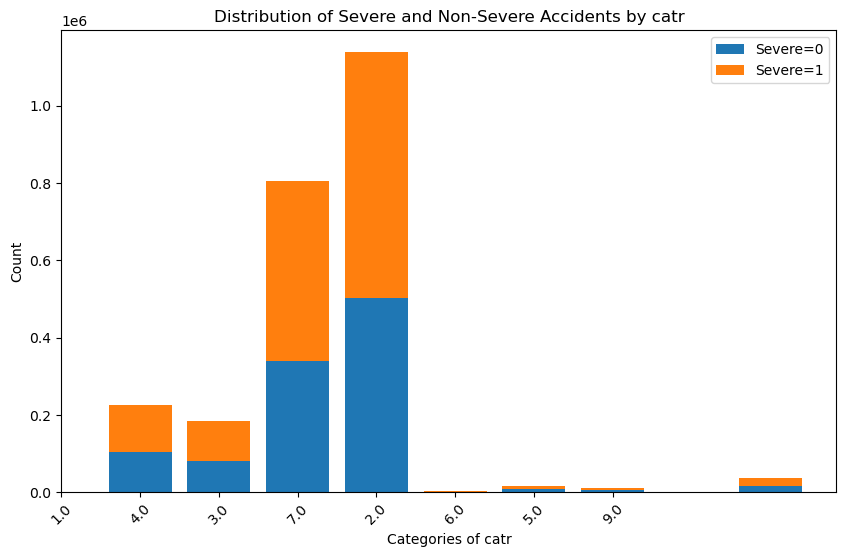

In [12]:
# Assuming you have a DataFrame 'df' with columns 'severe' and 'catr'
# 'severe' column contains binary values (0 for non-severe, 1 for severe)
# 'catr' column contains categorical values (1, 2, 3, 4, 5, 6, 9)

# Group the data by 'catr' and calculate the count of severe and non-severe accidents
grouped = df_M.groupby(['catr', 'Severe'])['Severe'].count().unstack().fillna(0)

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
bottom = None
for label in [0, 1]:  # 0 for 'Non-Severe', 1 for 'Severe'
    ax.bar(grouped.index, grouped[label], label=f'Severe={label}', bottom=bottom)
    if bottom is None:
        bottom = grouped[label]
    else:
        bottom += grouped[label]

# Customize the plot
ax.set_xlabel('Categories of catr')
ax.set_ylabel('Count')
ax.set_title('Distribution of Severe and Non-Severe Accidents by catr')
ax.legend()

# Show the plot
# Get the unique categories from your DataFrame
categories = df_M['catr'].unique()

# Show the plot with tick labels for unique categories
plt.xticks(range(len(categories)), categories, rotation=45)
plt.show()



In [13]:
severe_accidents_catr_1 = df_M[df_M['catr'] == 1]['grav'].value_counts().get(1, 0)
print("Number of severe accidents in category 1 of 'catr':", severe_accidents_catr_1)

Number of severe accidents in category 1 of 'catr': 100511


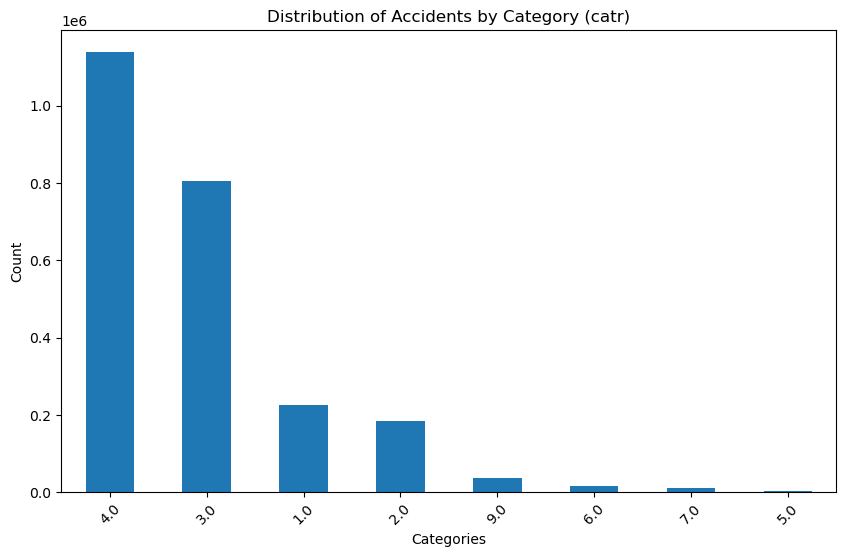

In [14]:
catr_counts = df_M['catr'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
catr_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Accidents by Category (catr)')
plt.xticks(rotation=45)
plt.show()




In [15]:
# cleanning variables that might not be used in the model
df_M['date']= pd.to_datetime(df_M.date,format='%Y-%m-%d')
df_M['year'] = df_M['date'].dt.year.astype(int)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_M['actp'] = le.fit_transform(df_M['actp'].astype(str))
df_M['hrmn'] = le.fit_transform(df_M['hrmn'].astype(str))

In [16]:
#cleanning variables that might not be used in the model
# grav removed because is similat to target 
df_rf = df_M.drop(['num_veh','adr','date','holiday','lat', 'long','datetime','grav','fatal'], axis=1)

In [17]:
#split the data for modeling
# 2005 to 2019 for trainning  and 2020 to 2021 to test

# Filter data for the training period (2005-2018)
train_data = df_rf[(df_rf['an'] >= 2005) & (df_rf['an'] <= 2015)]

# Filter data for the testing period (2019-2021)
test_data = df_rf[(df_rf['an'] >= 2016) & (df_rf['an'] <= 2019)]
 #Separate features and target variable9
X_train = train_data.drop('Severe', axis=1)  # Features for training
y_train = train_data['Severe']  # Target variable for training

# Separate features and target variable
X_test = test_data.drop('Severe', axis=1)  # Features for training
y_test = test_data['Severe']  # Target variable for training


In [18]:
df_rf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421684 entries, 201900000001 to 201800055766
Data columns (total 41 columns):
 #   Column        Dtype  
---  ------        -----  
 0   place         float64
 1   catu          int64  
 2   sexe          int64  
 3   an_nais       int64  
 4   trajet        float64
 5   locp          float64
 6   actp          int32  
 7   etatp         float64
 8   an            int64  
 9   mois          int64  
 10  jour          int64  
 11  hrmn          int32  
 12  lum           int64  
 13  agg           int64  
 14  int           int64  
 15  atm           float64
 16  col           float64
 17  dep           int64  
 18  metropolitan  float64
 19  catr          float64
 20  circ          float64
 21  nbv           float64
 22  vosp          float64
 23  prof          float64
 24  plan          float64
 25  surf          float64
 26  infra         float64
 27  situ          float64
 28  senc          float64
 29  catv          int64  
 30  oc

In [107]:
######this is new


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = clf.predict(X_test)

# Get the accuracy score
acc = accuracy_score(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("[Random Forest Algorithm] Accuracy Score: {:.3f}".format(acc))

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)




[Random Forest Algorithm] Accuracy Score: 0.768
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.74    225636
           1       0.80      0.77      0.79    286406

    accuracy                           0.77    512042
   macro avg       0.76      0.77      0.77    512042
weighted avg       0.77      0.77      0.77    512042



In [112]:
# Feature scaling for better results 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance using SMOTE
# SMOTE (synthetic minority oversampling technique) is one of the most 
# commonly used oversampling methods to solve the imbalance problem. 
# It aims to balance class distribution by randomly increasing minority 
# class examples by replicating them. SMOTE synthesises new minority 
# instances between existing minority instances. https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Instantiate Random Forest Classifier with hyperparameter tuning
forest = RandomForestClassifier(
    n_estimators=400,  # You can adjust this #100
    max_depth=10,       # You can adjust this
    min_samples_split=10,# 2 before
    min_samples_leaf=2, # 1 before
    random_state=42,
    class_weight='balanced',  # Handle class imbalance
    n_jobs=-1
)

# Train the model
forest.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_test_preds = forest.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_test_preds)
print('Classification Report Random Forest:\n', report)

KeyboardInterrupt: 

In [62]:
print("[Random Forest Algorithm] Accuracy Score: {:.3f}".format(acc))

[Random Forest Algorithm] Accuracy Score: 0.842


In [108]:
# import classifier
from sklearn.ensemble import RandomForestClassifier

# import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
# import evaluation tools
from sklearn.model_selection import KFold, cross_val_score
# create confusion matrix# create confusion matrix
matrix = confusion_matrix(y_test, y_test_preds)

# create dataframe
class_names = df_rf.Severe.values
dataframe = pd.DataFrame(matrix, index=['non-severe', 'severe'], 
                         columns=['non-severe', 'severe'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [512042, 350992]

In [123]:

# Assuming you have already calculated the confusion matrix
matrix = confusion_matrix(y_test, y_pred)  #y_test_preds

# Create a DataFrame from the confusion matrix
class_names = df_rf.Severe.values
dataframe = pd.DataFrame(matrix, index=['non-fatal', 'fatal'], 
                         columns=['non-fatal', 'fatal'])

# Display the confusion matrix as text
print("Confusion Matrix:")
print(dataframe)

Confusion Matrix:
           non-fatal   fatal
non-fatal     171283   54353
fatal          64502  221904


In [124]:
total_samples = matrix.sum()

# Calculate the percentages
percentages = (matrix / total_samples) * 100

# Create a DataFrame from the percentages
class_names = df_rf.Severe.values
dataframe = pd.DataFrame(percentages, index=['non-fatal', 'fatal'], columns=['non-fatal', 'fatal'])

# Display the confusion matrix as percentages
print("Confusion Matrix (Percentages):")
print(dataframe)

Confusion Matrix (Percentages):
           non-fatal     fatal
non-fatal  33.450967  10.61495
fatal      12.597014  43.33707


In [125]:
# etract thh values from DataFrame

true_negative = dataframe.loc['non-fatal', 'non-fatal']
false_positive = dataframe.loc['non-fatal', 'fatal']
false_negative = dataframe.loc['fatal', 'non-fatal']
true_positive = dataframe.loc['fatal', 'fatal']

# Print the values
print("True Negatives: the model correctly predicted", true_negative, " as non-fatal")
print("False Positives: the model incorrectly predicted", false_positive, "as *fatal")
print("False Negatives:the model incorrectly predicted", false_negative,"as *non-fatal")
print("True Positives:the model correctly predicted", true_positive,"as fatal")



True Negatives: the model correctly predicted 33.45096691287043  as non-fatal
False Positives: the model incorrectly predicted 10.614949554919322 as *fatal
False Negatives:the model incorrectly predicted 12.597013526234177 as *non-fatal
True Positives:the model correctly predicted 43.337070005976074 as fatal


In [126]:
# estimate the feature impotance for thi model
import numpy as np

# Access feature importances from the trained model
importances = forest.feature_importances_

feature_names = df_rf.drop(columns=['Severe']).columns.tolist()

# Check the lengths of feature_names and importances
print("Length of feature_names:", len(feature_names))
print("Length of importances:", len(importances))

# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()





KeyboardInterrupt: 

In [19]:
# import classifier
from sklearn.ensemble import RandomForestClassifier

# import metrics
from sklearn.metrics import classification_report, confusion_matrix

# import evaluation tools
from sklearn.model_selection import KFold, cross_val_score

# instantiate RandomForestClassifier with entropy and class_weight
forest_1 = RandomForestClassifier(random_state=4, criterion='entropy', n_jobs=-1, class_weight='balanced')

# train
forest_1.fit(X_train, y_train)

# predict
y_test_preds  = forest_1.predict(X_test)

# evaluate
report = classification_report(y_test, y_test_preds)
print('Classification Report Random Forest - with Entropy and class_weight Parameter: \n', report)



Classification Report Random Forest - with Entropy and class_weight Parameter: 
               precision    recall  f1-score   support

           0       0.74      0.75      0.74    225636
           1       0.80      0.79      0.79    286406

    accuracy                           0.77    512042
   macro avg       0.77      0.77      0.77    512042
weighted avg       0.77      0.77      0.77    512042



In [20]:


# cross-validation with F1 score (more appropriate to imbalanced classes)
cross_val_score(forest_1, X_train, y_train, scoring='f1_macro', n_jobs=2)




array([0.78403488, 0.78532502, 0.78910192, 0.79075417, 0.77806744])

In [21]:
from sklearn.model_selection import cross_val_score

# Instantiate the RandomForestClassifier with the desired settings
forest_1 = RandomForestClassifier(random_state=4, criterion='entropy', n_jobs=-1, class_weight='balanced')

# Perform cross-validation with F1 score
f1_scores = cross_val_score(forest_1, X_train, y_train, scoring='f1_macro', cv=5, n_jobs=-1)

# Print the F1 scores for each fold
print("F1 Scores (Cross-Validation):", f1_scores)

# Calculate and print the mean F1 score
mean_f1_score = f1_scores.mean()
print("Mean F1 Score (Cross-Validation):", mean_f1_score)


F1 Scores (Cross-Validation): [0.78403488 0.78532502 0.78910192 0.79075417 0.77806744]
Mean F1 Score (Cross-Validation): 0.7854566859036753


In [129]:
# Assuming you have already calculated the confusion matrix
matrix = confusion_matrix(y_test, y_pred)  #y_test_preds

# Create a DataFrame from the confusion matrix
class_names = df_rf.Severe.values
dataframe = pd.DataFrame(matrix, index=['non-fatal', 'fatal'], 
                         columns=['non-fatal', 'fatal'])

# Display the confusion matrix as text
print("Confusion Matrix:")
print(dataframe)
total_samples = matrix.sum()

# Calculate the percentages
percentages = (matrix / total_samples) * 100

# Create a DataFrame from the percentages
class_names = df_rf.Severe.values
dataframe = pd.DataFrame(percentages, index=['non-fatal', 'fatal'], columns=['non-fatal', 'fatal'])

# Display the confusion matrix as percentages
print("Confusion Matrix (Percentages):")
print(dataframe)

Confusion Matrix:
           non-fatal   fatal
non-fatal     171283   54353
fatal          64502  221904
Confusion Matrix (Percentages):
           non-fatal     fatal
non-fatal  33.450967  10.61495
fatal      12.597014  43.33707
